# Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

* Such a dataset where we have equal number of data points for each class is know as **a balanced data set**

## 2D Scatter Plot

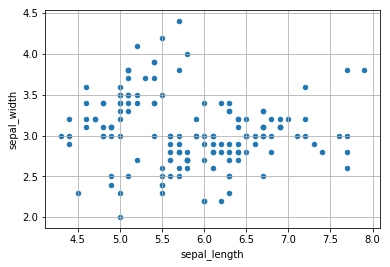

In [7]:
df.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.grid()
plt.show()

Note: The plot doesn't start at (0,0)
* Each dimension is a feature

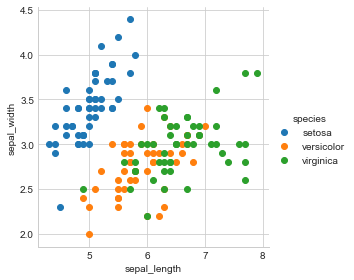

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

<img src="plot_problem_2d.png" height="500px" width="550px">

Points To Observe:
    
* Line can be drawn between setosa and (versicolor + virginica) to separate them
* But, line cannot be drawn between versicolor & virginica for separation

## 3D Scatter Plot

* https://plot.ly/pandas/3d-scatter-plots/
* Need a lot of mouse interaction to interpret the data

## Pair Plots

* Pairwise scatter plots
* Can be used when number of features are high
* Can be used when cannot visualize in 3D or greater
* Only possible to view 2D patterns

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


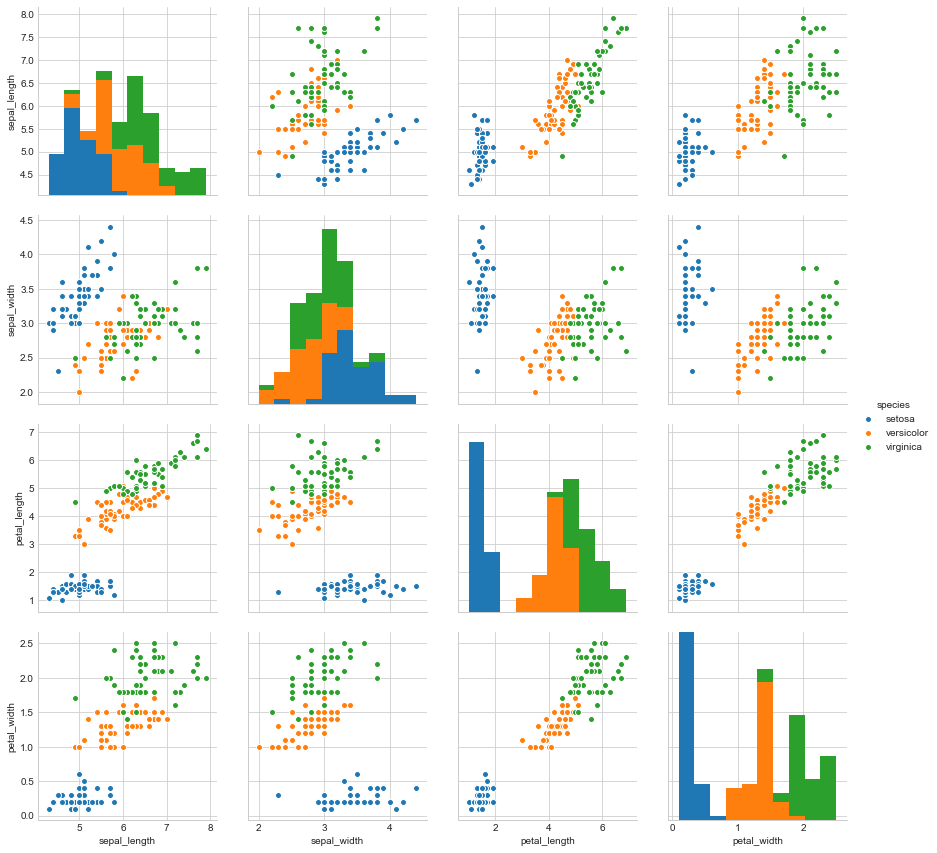

In [12]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue="species",size=3)
plt.show()

<img src="pair_plot_example.png" height="500px" width="550px">

**Observations**

* petal_length & petal_width are the most useful features to identify various flower types.
* While setosa can be easily identified (linearly separable), Virnica & Versicolor have some overlap.
* Simple if-else condiditions to model classification of flower types

**Limitations Of Pair Plots**

* Pair plots are easy to understand when the dimensionality is small
* When the dimension is large eg: 10, number of plots = 10C2, the number of plots will be large and difficult to analyze
* In such a case we use dimensionality reduction techniques, linear algebra.

In [26]:
df_setosa = df[df['species'] == 'setosa']
df_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df_virginica = df[df['species'] == 'virginica']
df_virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [30]:
df_versicolor = df[df['species'] == 'versicolor']
df_versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


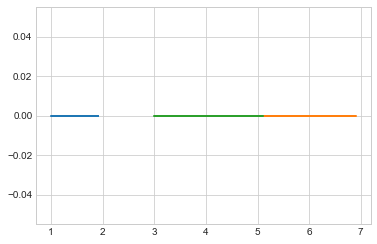

In [31]:
plt.plot(df_setosa['petal_length'], np.zeros_like(df_setosa['petal_length']))
plt.plot(df_virginica['petal_length'], np.zeros_like(df_virginica['petal_length']))
plt.plot(df_versicolor['petal_length'], np.zeros_like(df_versicolor['petal_length']))
plt.show()

* This 1D plot is not useful as there are many overlapping points (green under orange or orange under green) and cannot make out where and how many points exists and where they are located
* Alternatively we can make different windows and can plot the count of points that exists in a window. The graph will then form a histogram

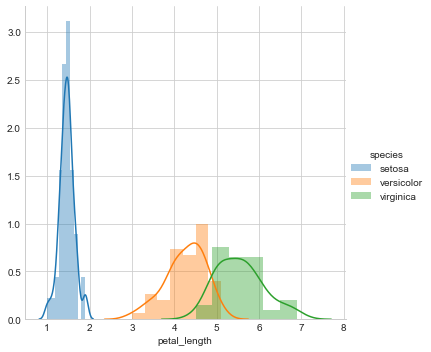

In [36]:
# Y Axis: Count
# X Axis: petal_length
sns.FacetGrid(df, hue='species', size=5) \
   .map(sns.distplot, 'petal_length') \
   .add_legend()
plt.show()

* The smooth lines are **pdf (probability density function)**: It is a **smooth histogram**
* Using this histogram, we can easily conclude if petal_length < 2, flower is setosa
* Histogram & pdf's overlap for versicolor & verginica. Can use the height of the plots to decide which flower it is based on petal_length